# Cloning the **damavand** repository

In [1]:
!git clone https://github.com/amirberenji1995/damavand

Cloning into 'damavand'...
remote: Enumerating objects: 263, done.
remote: Counting objects: 100% (263/263), done.
remote: Compressing objects: 100% (197/197), done.
remote: Total 263 (delta 132), reused 196 (delta 65), pack-reused 0 (from 0)
Receiving objects: 100% (263/263), 6.62 MiB | 13.62 MiB/s, done.
Resolving deltas: 100% (132/132), done.


In [2]:
!pip install -r damavand/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.0/163.0 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.3/140.3 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 88.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 102.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 505.5/505.5 kB 31.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.4/121.4 kB 9.2 MB/s eta 0:00:00
  Attempting uninstall: pytz
    Found existing installation: pytz 2025.2
    Uninstalling pytz-2025.2:
      Successfully

# Importings

In [1]:
from damavand.damavand.datasets.downloaders import read_addresses, MaFaulDaDownloader
from damavand.damavand.datasets.digestors import MaFauldDa
from damavand.damavand.signal_processing.transformations import *
from damavand.damavand.signal_processing.feature_extraction import *
from damavand.damavand.utils import *
import os
import pandas as pd
import numpy as np

# Instantiating a downloader object

In [2]:
addresses = read_addresses()
downloader = MaFaulDaDownloader({key: addresses['MaFaulDa'][key] for key in ['normal.zip', 'imbalance.zip']})
downloader.download_extract('mafaulda_zip_files/', 'mafaulda/')

Downloading:  normal.zip
Downloading:  imbalance.zip
Extracting:  normal.zip
Extracting:  imbalance.zip


# Instantiating a digestor object

In [3]:
mafaulda = MaFauldDa('mafaulda/', os.listdir('mafaulda/'), channels = [2])
mining_params = {
    'win_len': 50000,
    'hop_len': 50000
}
mafaulda.mine(mining_params)

# Aggregating data over the third channel

In [4]:
df = pd.concat(mafaulda.data[2]).reset_index(drop = True)
df

,0,1,2,3,4,5,6,7,8,9,...,49992,49993,49994,49995,49996,49997,49998,49999,state,severity
0,-0.769800,0.148490,-0.444640,-0.173230,-0.061578,-0.561010,0.245860,-0.681590,0.283750,-0.558160,...,-0.22701,-0.679750,0.081710,-0.79798,0.16689,-0.780670,-0.096885,-0.505490,imbalance,25g
1,-0.396390,-0.084910,-0.706400,0.098014,-0.841570,0.102120,-0.591070,-0.107300,-0.308920,-0.391270,...,0.15224,0.782750,0.366870,0.45279,0.63565,0.035932,0.801350,-0.068741,imbalance,25g
2,0.722450,-0.069506,0.381250,0.151030,0.075812,0.530700,-0.086285,0.769020,-0.080516,0.756980,...,-1.20120,-0.258320,-1.213800,-0.41387,-0.99852,-0.755430,-0.634810,-1.101700,imbalance,25g
3,-0.359160,-1.285900,-0.362660,-1.271400,-0.643180,-0.767570,-0.732520,-0.547600,-1.075200,-0.298390,...,0.70043,1.234100,0.529770,1.34420,0.42482,1.233200,0.657640,0.931680,imbalance,25g
4,1.061400,0.727540,1.370700,0.536410,1.378800,0.673500,1.267900,0.823470,0.929870,1.101900,...,-0.69956,-0.993960,-0.940630,-0.66817,-1.35880,-0.389490,-1.312700,-0.372960,imbalance,25g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1905,-0.029689,0.148640,-0.349120,0.342740,-0.351850,0.340670,-0.284620,0.096903,0.110810,-0.026946,...,-0.18006,0.186760,0.040866,-0.10206,0.31797,-0.285560,0.445120,-0.277080,normal,_
1906,0.358070,-0.107990,0.142550,0.164280,-0.129200,0.408630,-0.306600,0.481290,-0.260050,0.322450,...,-0.42628,0.417400,-0.364720,0.26404,-0.12011,-0.061874,0.209820,-0.326420,normal,_
1907,0.408730,-0.454570,0.397690,-0.295990,0.192650,-0.014766,-0.134890,0.289990,-0.393890,0.454840,...,-0.27756,0.095386,-0.642190,0.29521,-0.71886,0.263110,-0.439650,0.039742,normal,_
1908,-0.113390,-0.273610,0.240340,-0.373970,0.405140,-0.375480,0.324690,-0.205440,0.054960,0.064024,...,0.16796,-0.095137,-0.121100,0.22238,-0.31794,0.381740,-0.369100,0.364300,normal,_


In [5]:
signals, metadata = df.iloc[:, : -2], df.iloc[:, -2 :]
signals

,0,1,2,3,4,5,6,7,8,9,...,49990,49991,49992,49993,49994,49995,49996,49997,49998,49999
0,-0.769800,0.148490,-0.444640,-0.173230,-0.061578,-0.561010,0.245860,-0.681590,0.283750,-0.558160,...,-0.53685,-0.28361,-0.22701,-0.679750,0.081710,-0.79798,0.16689,-0.780670,-0.096885,-0.505490
1,-0.396390,-0.084910,-0.706400,0.098014,-0.841570,0.102120,-0.591070,-0.107300,-0.308920,-0.391270,...,0.15249,0.97625,0.15224,0.782750,0.366870,0.45279,0.63565,0.035932,0.801350,-0.068741
2,0.722450,-0.069506,0.381250,0.151030,0.075812,0.530700,-0.086285,0.769020,-0.080516,0.756980,...,-0.94616,-0.37918,-1.20120,-0.258320,-1.213800,-0.41387,-0.99852,-0.755430,-0.634810,-1.101700
3,-0.359160,-1.285900,-0.362660,-1.271400,-0.643180,-0.767570,-0.732520,-0.547600,-1.075200,-0.298390,...,1.09670,0.96135,0.70043,1.234100,0.529770,1.34420,0.42482,1.233200,0.657640,0.931680
4,1.061400,0.727540,1.370700,0.536410,1.378800,0.673500,1.267900,0.823470,0.929870,1.101900,...,-0.49750,-1.44260,-0.69956,-0.993960,-0.940630,-0.66817,-1.35880,-0.389490,-1.312700,-0.372960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1905,-0.029689,0.148640,-0.349120,0.342740,-0.351850,0.340670,-0.284620,0.096903,0.110810,-0.026946,...,-0.31529,0.40178,-0.18006,0.186760,0.040866,-0.10206,0.31797,-0.285560,0.445120,-0.277080
1906,0.358070,-0.107990,0.142550,0.164280,-0.129200,0.408630,-0.306600,0.481290,-0.260050,0.322450,...,-0.18523,0.36920,-0.42628,0.417400,-0.364720,0.26404,-0.12011,-0.061874,0.209820,-0.326420
1907,0.408730,-0.454570,0.397690,-0.295990,0.192650,-0.014766,-0.134890,0.289990,-0.393890,0.454840,...,0.14742,-0.28190,-0.27756,0.095386,-0.642190,0.29521,-0.71886,0.263110,-0.439650,0.039742
1908,-0.113390,-0.273610,0.240340,-0.373970,0.405140,-0.375480,0.324690,-0.205440,0.054960,0.064024,...,0.34270,-0.35081,0.16796,-0.095137,-0.121100,0.22238,-0.31794,0.381740,-0.369100,0.364300


In [6]:
metadata

,state,severity
0,imbalance,25g
1,imbalance,25g
2,imbalance,25g
3,imbalance,25g
4,imbalance,25g
...,...,...
1905,normal,_
1906,normal,_
1907,normal,_
1908,normal,_


In [7]:
metadata['comb'] = metadata['state'] + '_' + metadata['severity']
metadata['comb'].value_counts()

,count
comb,
imbalance_6g,245
imbalance_20g,245
normal__,245
imbalance_15g,240
imbalance_10g,240
imbalance_25g,235
imbalance_30g,235
imbalance_35g,225


# Signal Processing

## Envelope Extraction

In [8]:
signals_env = env(signals)
signals_env.shape

(1910, 50000)

## FFT

In [9]:
# Defenition of a window (to avoid leakage error) and a bandpass frequency filter (to both avoid aliasing and DC-component removal)
window = scipy.signal.windows.hann(signals_env.shape[1])
freq_filter = scipy.signal.butter(25, [5, 24500], 'bandpass', fs = 51200, output='sos')

In [10]:
signals_env_fft = fft(signals_env, freq_filter = freq_filter, window = window)
signals_env_fft.shape

(1910, 25000)

# ZoomedFFT

In [11]:
signals_env_ZoomedFFT = zoomed_fft(signals_env, 0, 1000, 2000, 51200, freq_filter = freq_filter, window = window)
signals_env_ZoomedFFT.shape

(1910, 2000)

# STFT

In [12]:
# Defenition of a window (to avoid leakage error) and a bandpass frequency filter (to both avoid aliasing and DC-component removal)
STFT_window = scipy.signal.windows.hann(2048)
STFT_freq_filter = scipy.signal.butter(25, [5, 24500], 'bandpass', fs = 51200, output='sos')

In [13]:
signals_env_STFT = stft(signals_env, 2048, 1000, STFT_freq_filter, STFT_window)
signals_env_STFT.shape

(1910, 48, 1024)

# Statistical Features

In [14]:
# Defining the feature-set to be extracted
features = {'mean': (np.mean, (), {}), 'var': (np.var, (), {}), 'rms': (rms, (), {})}

In [15]:
# Extracting the desired feature-set from time-domain signals
features_df = feature_extractor(signals, features)
features_df

,mean,var,rms
0,-0.012679,0.527956,0.726716
1,0.011876,0.529248,0.727591
2,-0.009493,0.528195,0.726832
3,0.005920,0.526064,0.725327
4,-0.001124,0.519390,0.720688
...,...,...,...
1905,-0.001377,0.096043,0.309910
1906,0.000114,0.095341,0.308773
1907,-0.001045,0.096605,0.310816
1908,0.000556,0.094486,0.307386


# Visualization

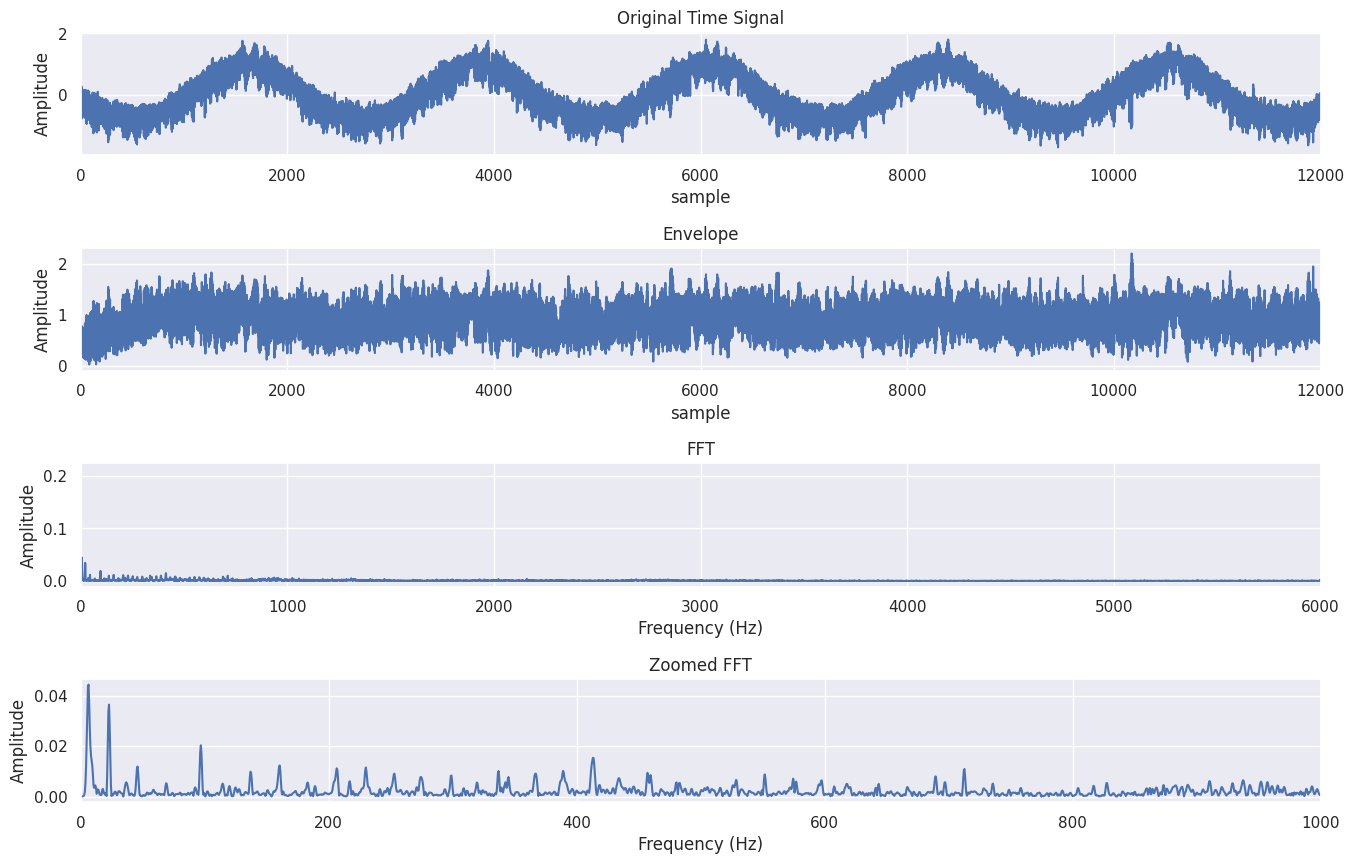

In [16]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.set()

fig, axes = plt.subplots(4, 1, figsize = (16, 10))

sns.lineplot(ax=axes[0], x=range(len(signals.iloc[0,:])), y = signals.iloc[0,:])
axes[0].set_title("Original Time Signal")
axes[0].set_ylabel("Amplitude")
axes[0].set_xlabel("sample")
axes[0].set_xlim(0, 12000)

sns.lineplot(ax=axes[1], x=range(len(signals_env.iloc[0,:])), y = signals_env.iloc[0, :])
axes[1].set_title("Envelope")
axes[1].set_ylabel("Amplitude")
axes[1].set_xlabel("sample")
axes[1].set_xlim(0, 12000)


sns.lineplot(ax=axes[2], x = fft_freq_axis(50000, 51200), y = signals_env_fft.iloc[0, :])
axes[2].set_title("FFT")
axes[2].set_ylabel("Amplitude")
axes[2].set_xlabel("Frequency (Hz)")
axes[2].set_xlim(0, 6000)


sns.lineplot(ax=axes[3], x = zoomed_fft_freq_axis(0, 1000, 2000), y = signals_env_ZoomedFFT.iloc[0, :])
axes[3].set_title("Zoomed FFT")
axes[3].set_ylabel("Amplitude")
axes[3].set_xlabel("Frequency (Hz)")
axes[3].set_xlim(0, 1000)


plt.subplots_adjust(hspace = 0.75)
fig.show()

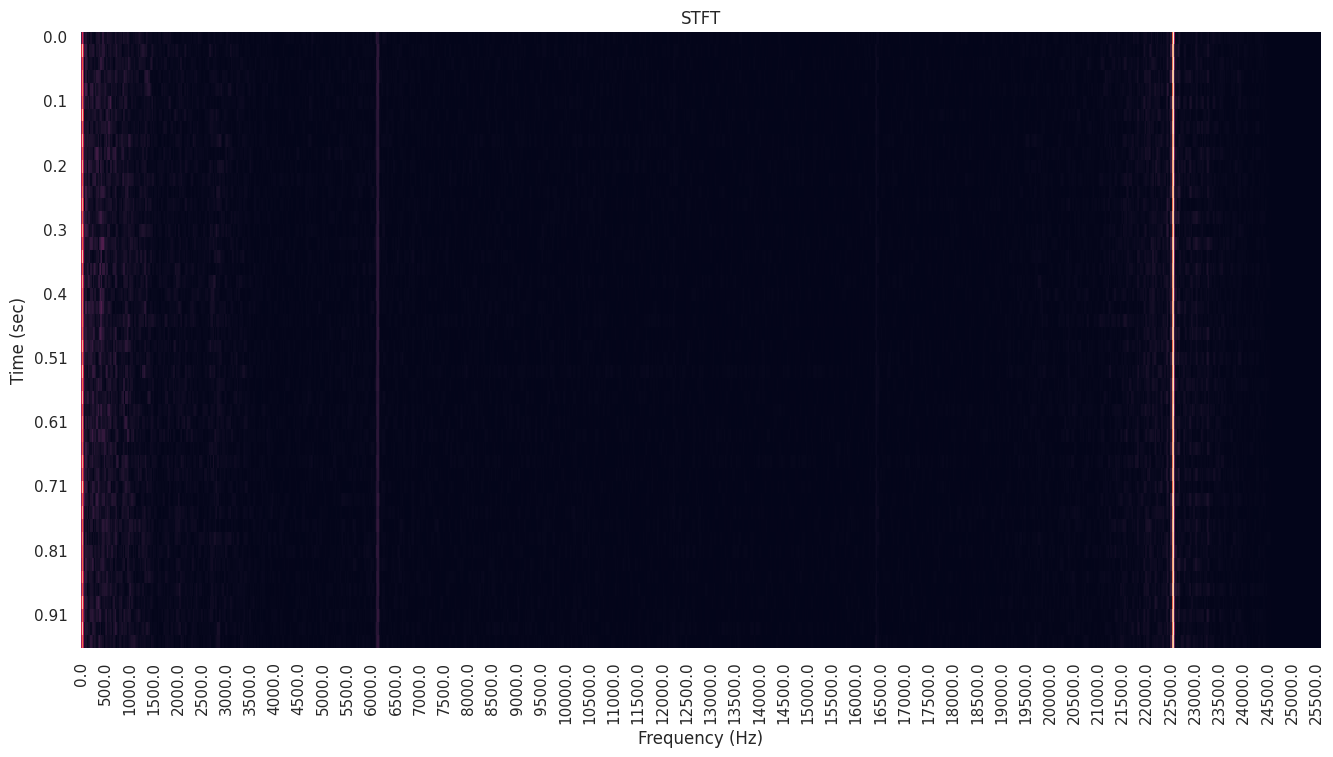

In [17]:
t = np.linspace(0, 50000/52600, 48)
f = fft_freq_axis(2048, 51200)

fig, ax = plt.subplots(figsize = (16, 8))

ax = sns.heatmap(signals_env_STFT[0, :, :], xticklabels = np.round(f, decimals = 2), yticklabels = np.round(t, decimals = 2), annot = False, cbar = False)
ax.set(xlabel = 'Frequency (Hz)', ylabel = 'Time (sec)')
ax.set_title('STFT')
ax.set_xticks(ax.get_xticks()[::20])
ax.set_yticks(ax.get_yticks()[::5])


fig.show()